In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn 

In [98]:
df = pd.read_csv(r'C:\Jupyternb\data\netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 1. Dataset Overview


In [100]:
df.shape


(8807, 12)

In [101]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [102]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [103]:
df.duplicated().sum()

np.int64(0)

In [104]:
df.describe(include="all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [105]:
df["country"].head(10)


0                                        United States
1                                         South Africa
2                                                  NaN
3                                                  NaN
4                                                India
5                                                  NaN
6                                                  NaN
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

In [106]:
df["country"].isna().sum() 

np.int64(831)

## 2. Data Cleaning

In [107]:
df_country = df.copy() # create a copy of the original dataframe

In [108]:
df_country["country"] = df_country["country"].str.split(", ") # split the country column into lists

In [109]:
df_country = df_country.explode("country") # explode the lists into separate rows

In [110]:
df_country = df_country.dropna(subset=["country"]) # drop rows with NaN in country column

## 3. Top Countries by Total Content

In [111]:
country_counts = (
    df_country["country"] # select the country column
    .value_counts() # count occurrences of each country
    .reset_index() # convert to dataframe
)

country_counts.columns = ["country", "titles_count"] # rename columns
country_counts.head(10) # show top 10 countries with most titles

,country,titles_count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


In [112]:
top10 = country_counts.head(10)
top10

,country,titles_count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


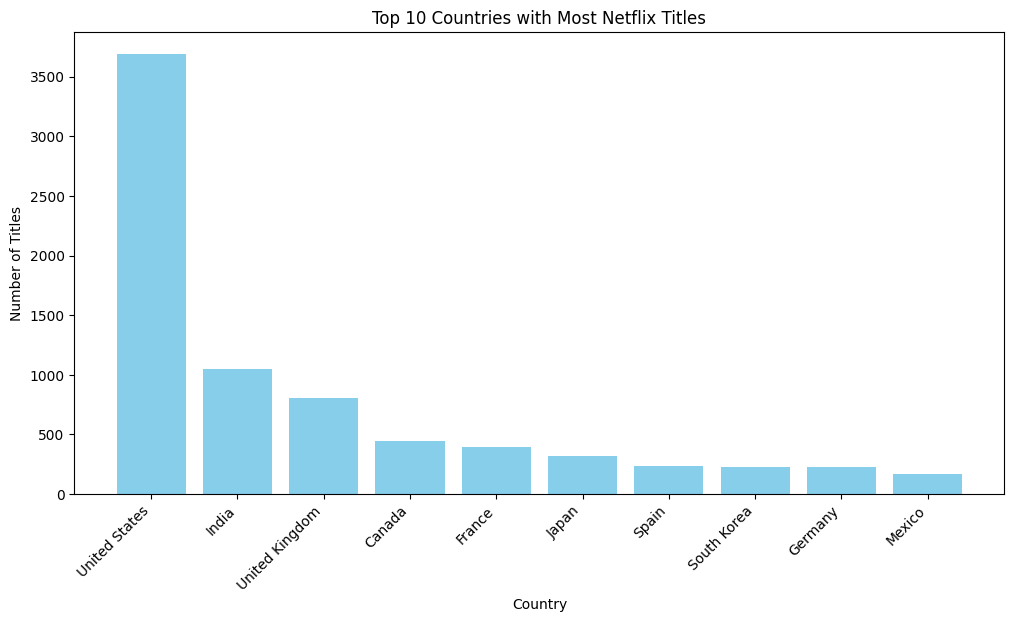

In [113]:
plt.figure(figsize=(12, 6))
plt.bar(top10["country"], top10["titles_count"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show() 

## 4. Movies vs TV Shows by Country

In [114]:
df["type"].value_counts() # count occurrences of each type


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [115]:
df_country[["type", "country"]].head() # show type and country columns


,type,country
0,Movie,United States
1,TV Show,South Africa
4,TV Show,India
7,Movie,United States
7,Movie,Ghana


In [116]:
country_type_counts = (
    df_country
    .groupby(["country", "type"]) # group by country and type
    .size()
    .reset_index(name="titles_count")  # reset index and name the count column
) # group by country and type

In [117]:
country_type_counts.head() # show the first few rows
 

,country,type,titles_count
0,,Movie,1
1,,TV Show,1
2,Afghanistan,Movie,1
3,Albania,Movie,1
4,Algeria,Movie,3


In [118]:
top_countries = (
    df_country["country"] #     select the country column
    .value_counts() # count occurrences of each country
    .head(10) # get top 10 countries
    .index # get country names
)

In [119]:
top_country_type = country_type_counts[ 
    country_type_counts["country"].isin(top_countries) # filter for top countries
] # filter for top countries


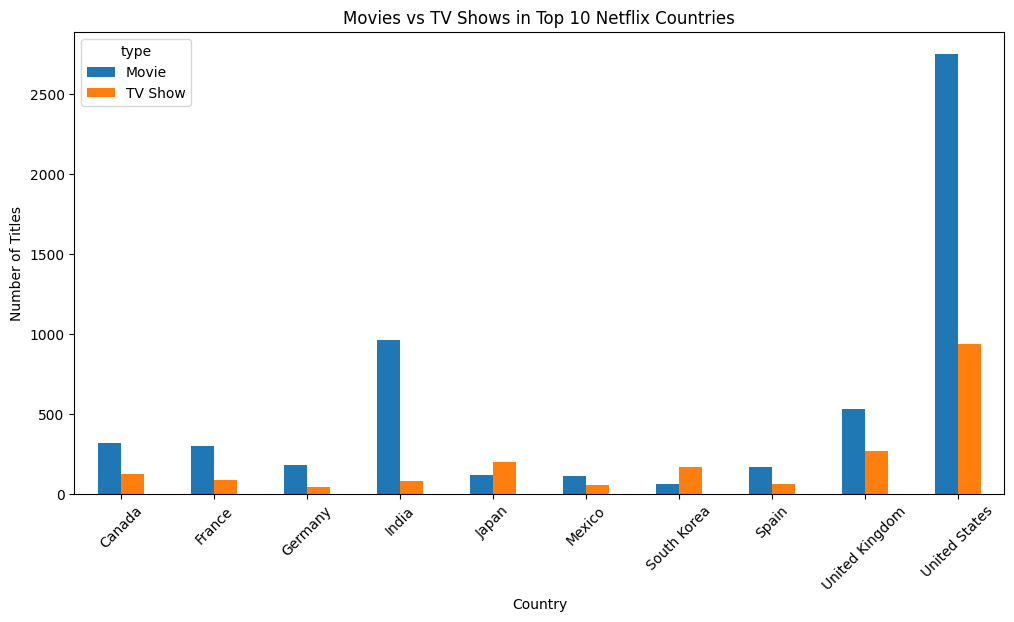

In [120]:
pivot = top_country_type.pivot(
    index="country",
    columns="type",
    values="titles_count" #     values to pivot
)

pivot.plot(
    kind="bar",
    figsize=(12,6),
    title="Movies vs TV Shows in Top 10 Netflix Countries" # plot title
)

plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show() # display the plot


## Key Insights

- The US dominates both Movies and TV Shows.
- Some countries (e.g. India) focus more on Movies.
- TV Shows are more concentrated in fewer countries.
